# Mathematical Methods Of Biopectroscopy Invivo: Assignment

## Reading the spectral data  from CSV file and visualizing for finding out location of peaks.

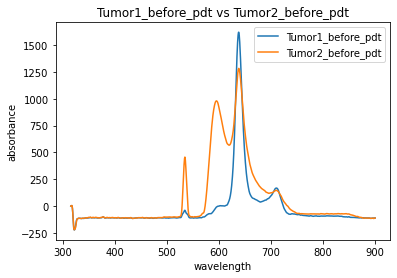

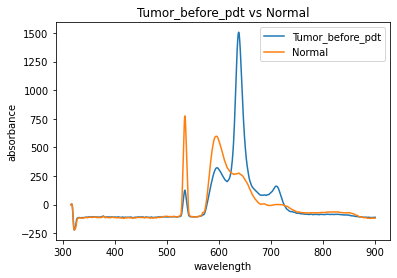

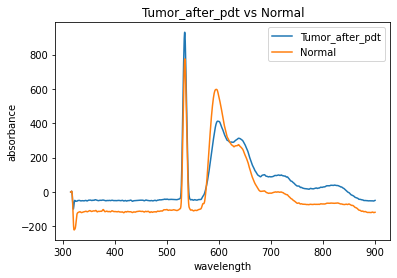

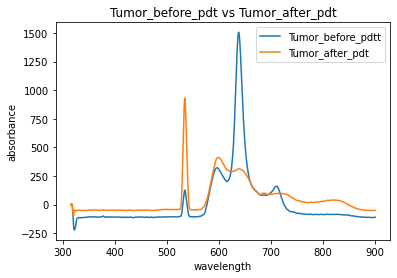

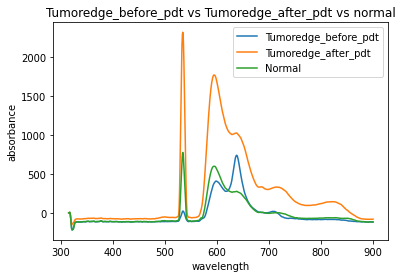

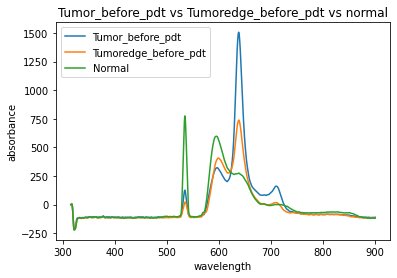

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

#reading csv file.
data = pd.read_csv('spectra1.csv')
#print(data.info())

#preparing sets of different samples and taking a mean of their absorbance at different wavelenghts.
Tumor1_before_pdt = data.iloc[0:,1:9].mean(axis=1)
Tumor2_before_pdt = data.iloc[0:,9:13].mean(axis=1)
Tumor_before_pdt = data.iloc[0:,1:13].mean(axis=1)
Tumoredge_before_pdt = data.iloc[0:,13:18].mean(axis=1)
Tumor_after_pdt = data.iloc[0:,21:33].mean(axis=1)
Tumoredge_after_pdt = data.iloc[0:,[18,19,20,36,37,38]].mean(axis=1)
Normal = data.iloc[0:,18:21].mean(axis=1)

wave = data.iloc[0:,0]
#print(wave)

#plotting graph with respect to wavelength and the test values.
plt.title("Tumor1_before_pdt vs Tumor2_before_pdt")

plt.plot(wave,Tumor1_before_pdt,label='Tumor1_before_pdt')
plt.plot(wave,Tumor2_before_pdt,label='Tumor2_before_pdt')
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("absorbance")
plt.show()

plt.title("Tumor_before_pdt vs Normal")
plt.plot(wave,Tumor_before_pdt,label='Tumor_before_pdt')
plt.plot(wave,Normal,label='Normal')
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("absorbance")
plt.show()

plt.title("Tumor_after_pdt vs Normal")
plt.plot(wave,Tumor_after_pdt,label='Tumor_after_pdt')
plt.plot(wave,Normal,label='Normal')
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("absorbance")
plt.show()

plt.title("Tumor_before_pdt vs Tumor_after_pdt")
plt.plot(wave,Tumor_before_pdt,label='Tumor_before_pdtt')
plt.plot(wave,Tumor_after_pdt,label='Tumor_after_pdt')
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("absorbance")
plt.show()

plt.title("Tumoredge_before_pdt vs Tumoredge_after_pdt vs normal")
plt.plot(wave,Tumoredge_before_pdt,label='Tumoredge_before_pdt')
plt.plot(wave,Tumoredge_after_pdt,label='Tumoredge_after_pdt')
plt.plot(wave,Normal,label='Normal')
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("absorbance")
plt.show()

plt.title("Tumor_before_pdt vs Tumoredge_before_pdt vs normal")
plt.plot(wave,Tumor_before_pdt,label='Tumor_before_pdt')
plt.plot(wave,Tumoredge_before_pdt,label='Tumoredge_before_pdt')
plt.plot(wave,Normal,label='Normal')
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("absorbance")
plt.show()


## Localizing peaks and calculation of peak area, amplitude and width

Sample                    Area_ratio    Amplitude_ratio    Width_ratio
----------------------  ------------  -----------------  -------------
Tumor beforePDT 1           1717.55           3204.14         147.974
Tumor beforePDT 1.1         1867.6            4167.14         152.034
Tumor beforePDT 1.2         2122.07           6772.93         205.849
Tumor beforePDT 1.3         1990.35           5065.58         177.672
Tumor beforePDT 1.4         1641.87           2912.25         136.466
Tumor beforePDT 1.5         1917.84           4925.31         173.036
Tumor beforePDT 1.6         1808.5            3702.38         148.992
Tumor beforePDT 1.7         1876.76           4287.19         155.01
Tumor beforePDT 2           1506.91            284.135        194.207
Tumor beforePDT 2.1         1492.24            280.606        195.756
Tumor beforePDT 2.2         1521.06            278.343        198.97
Tumor beforePDT 2.3         1497.65            281.428        195.137
Tumor edge beforePDT

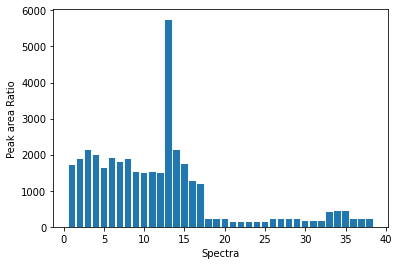

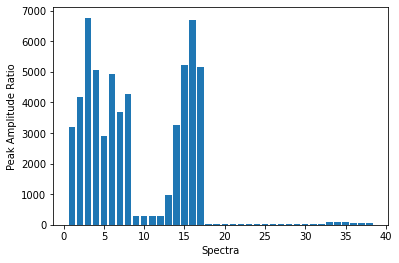

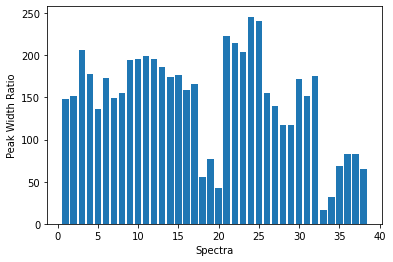

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks,peak_widths
from scipy import signal
from scipy.integrate import trapz
import pandas as pd
from tabulate import tabulate

#Read spectral data 
data = pd.read_csv('spectra1.csv')
peak_I = []
peak_F = []
peakw_I = []
peakw_F = []
area_I = []
area_F = []

#Estimating the peak location
for i in range(1,len(data.columns)):
    x = data.iloc[675:738,i]
    y = data.iloc[970:1110,i]
    
#calcualtion of area of peak
    arex = trapz(x)
    area_I.append(arex)
    arey = trapz(y)
    area_F.append(arey)
    
#Finding peaks and estimating repective peaks amplitude and half width
#Peak data acquisition for incident laser light
    peak1,v1 = find_peaks(x,height= -250)
    peak2,v2 = find_peaks(y,height= -250)
    l1 = []
    a = str(v1.values())[20:-5].split(',')
    for ii1 in a:
        l1.append(float(ii1))
    peak_I.append(max(l1))
    jj = []
    loc = l1.index(max(l1))
    peak = list(peak1)
    jj.append(peak[loc])
    width = peak_widths(x,jj,rel_height = 0.5)
    w=width[0]
    peakw_I.append(w[0])

#Peak data acquisition for flourescent light
    l2 = []
    b = str(v2.values())[20:-5].split(',')
    for ii2 in b:
        l2.append(float(ii2))
    peak_F.append(max(l2))
    jj = []
    loc = l2.index(max(l2))
    peak = list(peak2)
    jj.append(peak[loc])
    width = peak_widths(y,jj,rel_height = 0.5)
    w=width[0]
    peakw_F.append(w[0])
    
title=list(data.columns.values.tolist())
title.pop(0)  

#Calculating Ratios with respect to peak area, peak amplitude and peak half width
ratio = {}
for j in range(0,len(peak_I)):
    rat_amp = abs(peak_F[j]/peak_I[j])*100
    rat_width = abs(peakw_F[j]/peakw_I[j])*100
    rat_area = abs(area_F[j]/area_I[j])*100
    ratio[title[j]] = rat_area,rat_amp,rat_width
    
#Visualizing data calculated from ratios in both graphical and tabulated forms
val = [*range(1,39,1)]
headers = ['Sample','Area_ratio','Amplitude_ratio','Width_ratio']
print(tabulate([(k,) + v for k,v in ratio.items()],headers = headers))
are = [a_tuple[0] for a_tuple in ratio.values()]
amp = [a_tuple[1] for a_tuple in ratio.values()]
wid = [a_tuple[2] for a_tuple in ratio.values()]

plt.bar(val,are)
plt.ylabel("Peak area Ratio")
plt.xlabel("Spectra")
plt.show()

plt.bar(val,amp)
plt.ylabel("Peak Amplitude Ratio")
plt.xlabel("Spectra")
plt.show()

plt.bar(val,wid)
plt.ylabel("Peak Width Ratio")
plt.xlabel("Spectra")
plt.show()

## Processing datas from calculated ratios and estimate statistical distribution parameter

Distribution data for the Ratio of Area:
Distribution data for Tumor before PDT 1 :


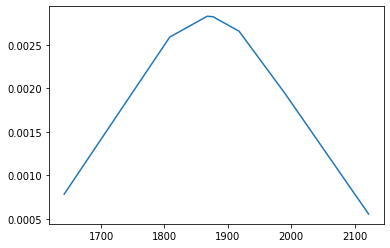

--------  ---------------------------------------------------------
mode      ModeResult(mode=array([1641.87301771]), count=array([1]))
skewness  0.1451096827387639
kurtosis  -0.6259846032038836
max       2122.069069314396
min       1641.8730177102634
sum       14942.549217005368
mean      1867.818652125671
std       141.15091321656843
median    1872.181556755911
--------  ---------------------------------------------------------
Distribution data for Tumor before PDT 2 :


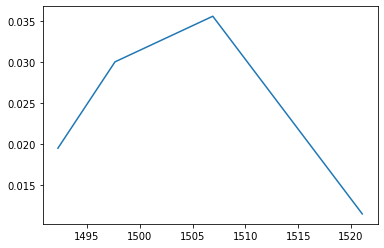

--------  ---------------------------------------------------------
mode      ModeResult(mode=array([1492.24045413]), count=array([1]))
skewness  0.46874997206294766
kurtosis  -1.237231290395116
max       1521.0643897526645
min       1492.240454133647
sum       6017.858322669399
mean      1504.4645806673498
std       10.925218466109387
median    1502.2767393915437
--------  ---------------------------------------------------------
Distribution data for Tumor before PDT :


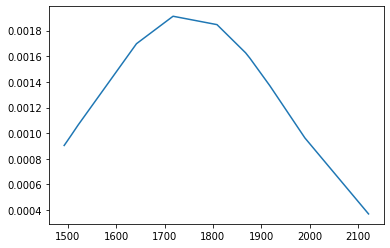

--------  ---------------------------------------------------------
mode      ModeResult(mode=array([1492.24045413]), count=array([1]))
skewness  0.17205340162141225
kurtosis  -1.2229975668451716
max       2122.069069314396
min       1492.240454133647
sum       20960.407539674765
mean      1746.7006283062303
std       206.54618141054547
median    1763.0280811053199
--------  ---------------------------------------------------------
Distribution data for Tumor edge before PDT :


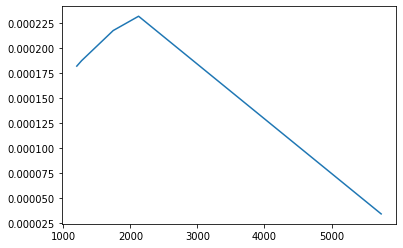

--------  ---------------------------------------------------------
mode      ModeResult(mode=array([1200.15185426]), count=array([1]))
skewness  1.3590476563155407
kurtosis  0.05508445401206785
max       5740.435460649786
min       1200.1518542578629
sum       12077.647093326541
mean      2415.529418665308
std       1695.7723923009742
median    1743.3658056614313
--------  ---------------------------------------------------------
Distribution data for Normal [Doctor Hand] :


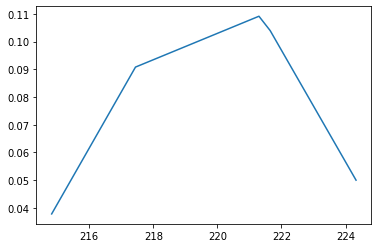

--------  --------------------------------------------------------
mode      ModeResult(mode=array([214.82935877]), count=array([1]))
skewness  -0.27446693137992195
kurtosis  -1.2730047736231016
max       224.32617891261572
min       214.82935877444186
sum       1099.544326152061
mean      219.90886523041223
std       3.35663909315328
median    221.29684565321202
--------  --------------------------------------------------------
Distribution data for Tumor after PDT :


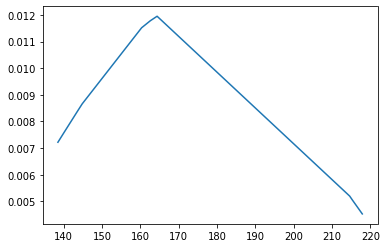

--------  -------------------------------------------------------
mode      ModeResult(mode=array([217.8571924]), count=array([2]))
skewness  0.5207825925600951
kurtosis  -1.5153345038939714
max       217.85719240351423
min       138.49697962442482
sum       2063.7541455911255
mean      171.97951213259378
std       32.47004461998345
median    161.4549306112111
--------  -------------------------------------------------------
Distribution data for Tumor edge after PDT :


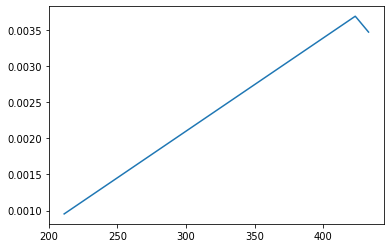

--------  --------------------------------------------------------
mode      ModeResult(mode=array([211.07402556]), count=array([1]))
skewness  -1.1490270566710223
kurtosis  -0.6708728092146439
max       433.231738070414
min       211.07402556149825
sum       1492.3705654265614
mean      373.09264135664034
std       93.61753886358531
median    424.0324008973246
--------  --------------------------------------------------------
Distribution data for the Ratio of Width:
Distribution data for Tumor before PDT 1 :


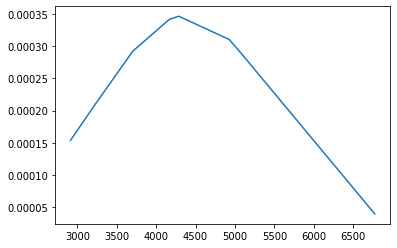

--------  ---------------------------------------------------------
mode      ModeResult(mode=array([2912.25224638]), count=array([1]))
skewness  0.7509345875063348
kurtosis  -0.1302426757013606
max       6772.930296512252
min       2912.2522463810565
sum       35036.9235336134
mean      4379.615441701675
std       1148.0155271765384
median    4227.167677046338
--------  ---------------------------------------------------------
Distribution data for Tumor before PDT 2 :


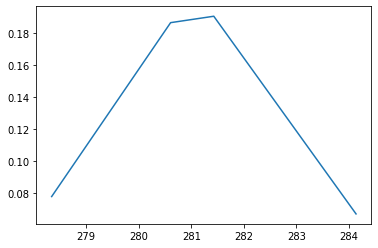

--------  --------------------------------------------------------
mode      ModeResult(mode=array([278.34311237]), count=array([1]))
skewness  0.15383652390481875
kurtosis  -1.0711240708000984
max       284.13450319953506
min       278.34311237373146
sum       1124.5117332945013
mean      281.1279333236253
std       2.071014629634886
median    281.01705886061745
--------  --------------------------------------------------------
Distribution data for Tumor before PDT :


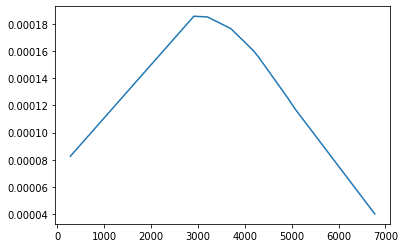

--------  --------------------------------------------------------
mode      ModeResult(mode=array([278.34311237]), count=array([1]))
skewness  -0.07484162539217777
kurtosis  -1.2035362713411486
max       6772.930296512252
min       278.34311237373146
sum       36161.4352669079
mean      3013.4529389089917
std       2147.423533337804
median    3453.259707984891
--------  --------------------------------------------------------
Distribution data for Tumor edge before PDT :


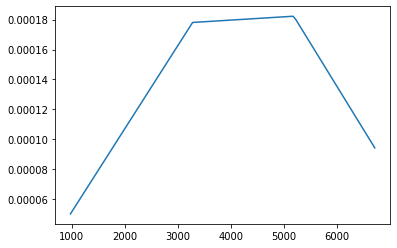

--------  --------------------------------------------------------
mode      ModeResult(mode=array([977.14701961]), count=array([1]))
skewness  -0.5369261548875
kurtosis  -0.9536775260748662
max       6707.147177271274
min       977.1470196054983
sum       21352.71301133626
mean      4270.542602267252
std       1973.936660406918
median    5168.785619533783
--------  --------------------------------------------------------
Distribution data for Normal [Doctor Hand] :


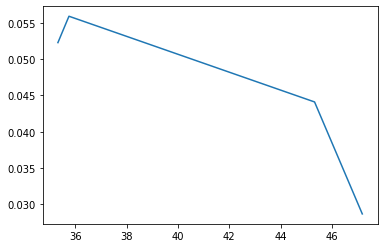

--------  ------------------------------------------------------
mode      ModeResult(mode=array([35.3142822]), count=array([1]))
skewness  0.4438644999222691
kurtosis  -1.7496359298487087
max       47.18821617527765
min       35.3142822043338
sum       199.24783484466374
mean      39.84956696893275
std       5.266983356845844
median    35.745680754198645
--------  ------------------------------------------------------
Distribution data for Tumor after PDT :


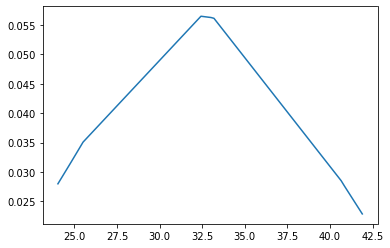

--------  -------------------------------------------------------
mode      ModeResult(mode=array([41.89647161]), count=array([2]))
skewness  0.18873867023341628
kurtosis  -1.6008450343320657
max       41.89647160507476
min       24.031935511301306
sum       388.8033601144052
mean      32.400280009533766
std       7.061333282025449
median    32.72506775818805
--------  -------------------------------------------------------
Distribution data for Tumor edge after PDT :


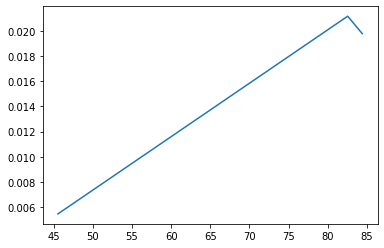

--------  -------------------------------------------------------
mode      ModeResult(mode=array([45.53628733]), count=array([1]))
skewness  -1.147897512238575
kurtosis  -0.6716959332485253
max       84.41788731166871
min       45.53628732511955
sum       295.2811947338799
mean      73.82029868346997
std       16.34569590932756
median    82.66351004854582
--------  -------------------------------------------------------


In [3]:
from scipy.stats import skew, kurtosis, mode
import math

Ratio_of_Area = np.array(are)
Ratio_of_Amplitude = np.array(amp)
Ratio_of_width = np.array(wid)
n = 0
sample = [Ratio_of_Area,Ratio_of_Amplitude]
stats = []
for zoy in sample:
    if  n==0:print("Distribution data for the Ratio of Area:")
    elif n==1:print("Distribution data for the Ratio of Width:")
    nor = list(zoy[17:20])+list(zoy[36:39])
    norm = np.array(nor)
    data_dict={
        'Tumor before PDT 1':zoy[0:8],
        'Tumor before PDT 2':zoy[8:12],
        'Tumor before PDT':zoy[0:12],
        'Tumor edge before PDT':zoy[12:17],
        'Normal [Doctor Hand]':norm,
        'Tumor after PDT':zoy[20:32],
        'Tumor edge after PDT':zoy[32:36]
    }
    n+=1
    for k in data_dict:
        print("Distribution data for",k,":")
        x = data_dict[k]
        stat_dict={
            'mode': mode(x),
            'skewness': skew(x),
            'kurtosis': kurtosis(x),
            'max': x.max(),
            'min': x.min(),
            'sum': x.sum(),
            'mean': x.mean(),
            'std': x.std(),
            'median': np.median(x)
        }
        
        guass = []
        xy = np.sort(x)
        sam = list(xy)
        for i in sam:
            ex = np.exp(-0.5*np.square((i-x.mean())/x.std()))/(x.std()*np.sqrt(2*math.pi))
            guass.append(ex)
        xx = np.array(guass)
        plt.plot(xy,xx)
        plt.show()
        
        print(tabulate(zip(stat_dict.keys(),stat_dict.values())))
        stats.append(stat_dict)

## Testing multiple comparison hypothesis testing of Bornferroni correction

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, f_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scikit_posthocs import posthoc_tukey as tukey

Ratio_of_Area = np.array(are)
Ratio_of_Amplitude = np.array(amp)
Ratio_of_width = np.array(wid)
n = 0
sample = [Ratio_of_Area,Ratio_of_Amplitude]
stats = []
for zoy in sample:
    nor = list(zoy[17:20])+list(zoy[36:39])
    norm = np.array(nor)
    
    stat,pvalue = f_oneway(zoy[0:8],zoy[8:12],zoy[0:12],zoy[12:17],norm,zoy[20:32],zoy[32:36])
    conc = "in" if pvalue>0.05 else ""
    lu = "the data from peak area ratio." if n==0 else "the data from peak amplitude ratio."
    print(f'Results are statically {conc}significant for {lu}'
          f'\nWe can {"not" if pvalue>0.05 else ""} apply pairwise comparison.')
    n+=1
   
    if pvalue<0.05:
        dat = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data_dict.items() ]))
        dat = dat.melt(var_name='groups', value_name='values')
    # Multiple comparison
    # Student criteria with Bonferroni correction
        mcls = MultiComparison(dat['values'],dat['groups'])
        print(mcls.allpairtest(ttest_rel, method='bonf')[0])
        #print(mcls.allpairtest(ttest_rel, method='holm')[0])
        #print(mcls.tukeyhsd().summary())
    